# Implementing a perceptron

![Alt text](./assets/perceptron.png)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/perceptron_toydata-truncated.txt", sep="\t")
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [3]:
x_train = df[["x1", "x2"]].values
y_train = df.label.values

In [4]:
x_train.shape, y_train.shape

((20, 2), (20,))

### Checking labels balance


In [5]:
np.bincount(y_train)

array([10, 10], dtype=int64)

### Some viz


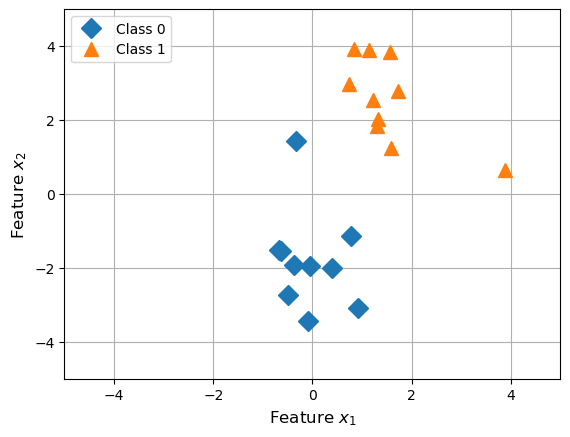

In [6]:
plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1],
         marker="D", markersize=10, label="Class 0", linestyle="", )

plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1],
         marker="^", markersize=10, label="Class 1", linestyle="", )

plt.legend(loc=2)
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

In [7]:
from typing import Union, Literal
import random

INPUT_FEATURE = Union[list[int], np.array, int]


class Perceptron:
    def __init__(self, num_features: int) -> None:
        self.num_features = num_features
        self.weights = [random.random() for _ in range(num_features)]
        self.bias = 0.0

    def __str__(self) -> str:
        return f"Perceptron\nWeights: {self.weights}\nBias: {self.bias}"

    def __call__(self, x: INPUT_FEATURE) -> Literal[0, 1]:
        return self._forward(x)

    def _forward(self, x: INPUT_FEATURE):
        z = self.bias

        for idx, _ in enumerate(self.weights):
            z += x[idx] * self.weights[idx]

        return 1 if z > 0.0 else 0

    def _update(self, x: INPUT_FEATURE, y_true: int):
        prediction = self(x)
        error = y_true - prediction

        # update
        self.bias += error
        for idx, _ in enumerate(self.weights):
            self.weights[idx] += error * x[idx]

        return error

    def fit(
        self,
        features: Union[list[int], np.array],
        labels: Union[list[int], np.array],
        num_epochs: int,
    ):
        for epoch in range(num_epochs):
            error_count = 0

            for x, y in zip(features, labels):
                error = self._update(x, y)
                error_count += abs(error)

            print(f"Epoch: {epoch + 1} => Errors: {error_count}")

    def summary(self):
        print(self, "\n")

In [8]:
model = Perceptron(num_features=2)
model.summary()
model.fit(x_train, y_train, num_epochs=5)
model.summary()

Perceptron
Weights: [0.40003546533302226, 0.8324712158812145]
Bias: 0.0 

Epoch: 1 => Errors: 3
Epoch: 2 => Errors: 1
Epoch: 3 => Errors: 0
Epoch: 4 => Errors: 0
Epoch: 5 => Errors: 0
Perceptron
Weights: [4.030035465333022, 1.6724712158812145]
Bias: -2.0 



In [9]:
def compute_accuracy(net: Perceptron, features: INPUT_FEATURE, labels: INPUT_FEATURE):
    correct = 0.0

    for x, y in zip(features, labels):
        prediction = net(x)
        correct += int(prediction == y)

    return correct / len(labels)

In [10]:
train_acc = compute_accuracy(model, x_train, y_train)
train_acc

1.0

$$
\begin{align}
x_1w_1 + x_2w_2 + b &= 0 \\
x_2w_2 &= - x_1w_1 - b \\
x_2 &= \frac{-x_1w_1 - b}{w_2}
\end{align}
$$


In [11]:
def plot_boundary(net: Perceptron):
    w1, w2 = model.weights[0], model.weights[1]
    b = net.bias

    x1_min = -20
    x2_min = (-(x1_min * w1) - b) / w2

    x1_max = 20
    x2_max = (-(x1_max * w1) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

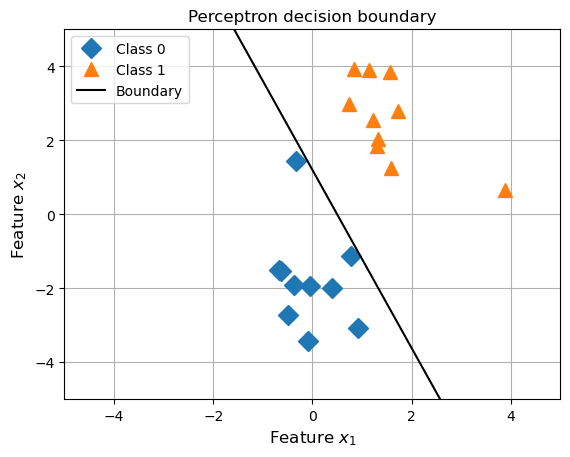

In [14]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(net=model)

plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1],
         marker="D", markersize=10, label="Class 0", linestyle="", )

plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1],
         marker="^", markersize=10, label="Class 1", linestyle="", )

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k", label="Boundary")

plt.legend(loc=2)
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.title("Perceptron decision boundary")
plt.grid()
plt.show()